In [20]:
import numpy as np
import numpy.polynomial.legendre as leg
import scipy as sc
from scipy.stats import norm
from scipy import optimize as op
import math
import cmath

In [21]:
class BlackScholes:
    def __init__(self, forward, vol):
        self.forward = forward
        self._log_forward = math.log(forward)
        self.vol = vol

    def char_func(self, u, maturity):
        i = complex(0, 1)
        return cmath.exp(i * u * self._log_forward - 0.5 * self.vol * self.vol * maturity * u * (u + i))
    
    def forward_opt(self, strike, maturity):
        d1 = (math.log(self.forward / strike) + 0.5 * self.vol * self.vol * maturity) / (self.vol * math.sqrt(maturity))
        d2 = d1 - self.vol * math.sqrt(maturity)
        nd1 = norm.cdf(d1)
        nd2 = norm.cdf(d2)
        return self.forward * nd1 - strike * nd2

In [3]:
def gauss_legendre_integrate(func, n, a, b):
    gauleg = leg.leggauss(n)
    gauleg_x = (gauleg[0] + 1) / 2 * (b-a) + a
    gauleg_w = gauleg[1] * (b-a)/2
    gauleg_x_w = zip(gauleg_x, gauleg_w)
    return sum(map(lambda x: func(x[0]) * x[1], gauleg_x_w))

In [52]:
def gil_pelaez_bs(forward, strike, maturity, vol, num_abscissae, integration_bound):
    bs = BlackScholes(forward, vol)
    integration_bound = 1000.0
    log_strike = math.log(strike)
    i = complex(0, 1)
    phi_minus_i = complex(0, 1) * bs.char_func(-i, maturity)
    s_func = lambda x: cmath.exp(-i * x * log_strike) * bs.char_func(x - i, maturity) / (i * x * bs.char_func(-i, maturity))
    s_prob = 0.5 + 1.0 / math.pi * gauss_legendre_integrate(s_func, num_abscissae, 0, integration_bound).real
    p_func = lambda x: cmath.exp(-i * x * log_strike) * bs.char_func(x, maturity) / (i * x)
    p_prob = 0.5 + 1.0 / math.pi * gauss_legendre_integrate(p_func, num_abscissae, 0, integration_bound).real
    return bs.forward * s_prob - strike * p_prob

In [44]:
def implied_vol_bs(forward, strike, maturity, price):
    func = lambda x: BlackScholes(forward, x).forward_opt(strike, maturity) - price
    root = op.root(func, 0.2)
    if root.success == False:
        raise Exception('Could not calculate implied volatility for option with (F, K, T, price): (' + \
                        str(forward) + ', ' + str(strike) + ', ' + str(maturity) + ', ' + str(price) + ')')
    return root.x[0]

In [46]:
implied_vol_bs(100.0, 100.0, 2.0, 11.246)

0.19999477954915698

In [47]:
import matplotlib.pyplot as plt

In [ ]:
num_abscissae = [1.0, 10.0, 100.0, 200.0, 300.0, 400.0, 500.0]
plt.plot(abscissae, )
plt.title('Title')
plt.show()

In [55]:
num_abscissae = range(1, 1000)
[gil_pelaez_bs(100.0, 100.0, 2.0, 0.2, n, 1000.0) for n in num_abscissae]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.782503530506801e-10,
 1.6412958096623242e-05,
 0.0038225767028166047,
 0.08953161672103249,
 0.6000545638601622,
 1.9592516669090472,
 4.15361680195636,
 6.72886825793357,
 9.171796145281135,
 11.157698606827381,
 12.57402841790045,
 13.447422588514605,
 13.868374514322603,
 13.942692409463092,
 13.767912934995337,
 13.426078055243451,
 12.98529762836312,
 12.503835315128242,
 12.032135593607116,
 11.611439163295785,
 11.270752048568987,
 11.024821966299939,
 10.874593882804156,
 10.809973408710029,
 10.813792966083668,
 10.865811352895378,
 10.945991044438664,
 11.03677321592751,
 11.124388379823017,
 11.199371858196471,
 11.256469540747084,
 11.29410156167448,
 11.313541018457343,
 11.317962229826293,
 11.311502633980957,
 11.29845449472775,
 11.28266005869915,
 11.267137330382582,
 11.253923768272223,
 11.244097928294266,
 11.237925417614491,
 11.235073402270004,
 11.234844118828697,
 11.236389134191967,
 11.23887960550239,
 11.24162111809207,


In [60]:
[implied_vol_bs(forward = 100.0, maturity = 2.0, strike = 100.0, price = price) - 0.2 for price in _55]

[-0.20000000000000001,
 -0.20000000000000001,
 -0.20000000000000001,
 -0.20000000000000001,
 -0.20000000000000001,
 -0.20000000000000001,
 -0.1999999999862058,
 -0.19999970908789202,
 -0.19993224659200121,
 -0.19841309307862806,
 -0.18936420951609054,
 -0.16526967773414655,
 -0.12634577507626887,
 -0.080592188406484203,
 -0.037074461180583468,
 -0.0015859259946429116,
 0.023799457724996531,
 0.039489111236083008,
 0.047061512857236698,
 0.048399129149617776,
 0.045253698507871448,
 0.0391053343019441,
 0.031183948766367819,
 0.022539729490051091,
 0.014078846428214276,
 0.0065392783532379761,
 0.00043791697687065034,
 -0.0039641178598550653,
 -0.0066521942171937909,
 -0.0078082524321937408,
 -0.0077399242516176248,
 -0.0068093209660327336,
 -0.0053747509932210724,
 -0.0037502402611623853,
 -0.0021821562897104407,
 -0.0008399536036579891,
 0.00018221397370440928,
 0.00085596276603921995,
 0.0012040169462684824,
 0.0012831783225263627,
 0.0011675200751152803,
 0.00093389889348713395,
 0.

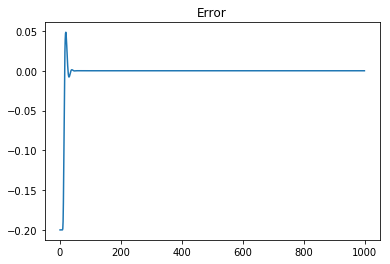

In [63]:
plt.plot(range(1, 1000), _60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Error")
plt.show()